# Importing libraries and file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('18-05jobsProcesseda.csv')

# Data exploration

Searching for columns with missing values

In [3]:
missing_data = df.isnull()

In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts()) #value_counts shows number of specific values in each column
    print("")

data_date
False    20
Name: data_date, dtype: int64

crawl_date
False    20
Name: crawl_date, dtype: int64

crawl_url
False    20
Name: crawl_url, dtype: int64

adsAge
False    20
Name: adsAge, dtype: int64

jobs
False    20
Name: jobs, dtype: int64

Vollzeit
False    20
Name: Vollzeit, dtype: int64

Festanstellung
False    20
Name: Festanstellung, dtype: int64

Teilzeit
False    20
Name: Teilzeit, dtype: int64

Befristet
False    20
Name: Befristet, dtype: int64

Minijob
False    20
Name: Minijob, dtype: int64

Freie Mitarbeit
False    20
Name: Freie Mitarbeit, dtype: int64

Ausbildung
False    20
Name: Ausbildung, dtype: int64

Praktikum
False    20
Name: Praktikum, dtype: int64

Werkvertrag
False    20
Name: Werkvertrag, dtype: int64

Auf Kommission
False    20
Name: Auf Kommission, dtype: int64

München
False    20
Name: München, dtype: int64

Berlin
False    20
Name: Berlin, dtype: int64

Hamburg
False    20
Name: Hamburg, dtype: int64

Hannover
False    20
Name: Hannover, dtype: 

In [5]:
# Creating an array of columns that have no missing values
full_cols = []
for column in missing_data.columns.values.tolist():
    miss_count = missing_data[column].value_counts()
    if miss_count.values[0]==20:
        full_cols.append(column)

In [6]:
full_cols

['data_date',
 'crawl_date',
 'crawl_url',
 'adsAge',
 'jobs',
 'Vollzeit',
 'Festanstellung',
 'Teilzeit',
 'Befristet',
 'Minijob',
 'Freie Mitarbeit',
 'Ausbildung',
 'Praktikum',
 'Werkvertrag',
 'Auf Kommission',
 'München',
 'Berlin',
 'Hamburg',
 'Hannover',
 'Frankfurt am Main',
 'Düsseldorf',
 'Köln',
 'Stuttgart',
 'Leipzig',
 'company0',
 'company0Ads',
 'company1',
 'company1Ads',
 'company2',
 'company2Ads',
 'company3',
 'company3Ads',
 'company4',
 'company4Ads',
 'company5',
 'company5Ads',
 'company6',
 'company6Ads',
 'company7',
 'company7Ads',
 'company8',
 'company8Ads',
 'company9',
 'company9Ads',
 'company10',
 'company10Ads',
 'company11',
 'company11Ads',
 'company12',
 'company12Ads',
 'company13',
 'company13Ads',
 'company14',
 'company14Ads',
 'Deutsch',
 'English',
 'Nederlands',
 'jobs_lastday',
 'dtd_jobs',
 'Vollzeit_lastday',
 'dtd_Vollzeit',
 'Festanstellung_lastday',
 'dtd_Festanstellung',
 'Teilzeit_lastday',
 'dtd_Teilzeit',
 'Befristet_lastday',


# Excluding weekends (bdf)

In [7]:
business_days = pd.date_range(start= df['data_date'].iloc[0], end= df['data_date'].iloc[-1], freq='B')

In [8]:
df.set_index(pd.DatetimeIndex(df['data_date']), inplace=True)

In [9]:
bdf = df.loc[business_days, :]

In [10]:
bdf['dayname'] = bdf.index.weekday_name

In [11]:
bdf[['dayname','jobs','jobs_lastday','dtd_jobs']]

,dayname,jobs,jobs_lastday,dtd_jobs
2020-04-29,Wednesday,129114,122708,6406
2020-04-30,Thursday,122708,116491,6217
2020-05-01,Friday,116491,109190,7301
2020-05-04,Monday,105597,104471,1126
2020-05-05,Tuesday,104471,96923,7548
2020-05-06,Wednesday,96923,88971,7952
2020-05-07,Thursday,88971,81309,7662
2020-05-08,Friday,81309,72630,8679
2020-05-11,Monday,63114,61696,1418
2020-05-12,Tuesday,61696,52229,9467


## Graph for the last 2 weeks - jobs added per city/job type each day

C:\Users\AGrze\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


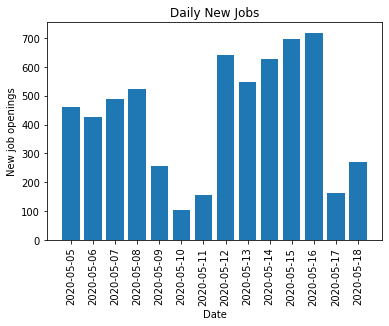

In [12]:
# Graph for Berlin - testing things to use in the graphs for all changes
x = pd.date_range(end=df.index[-1], periods=14)
y = df.loc[pd.date_range(end=df.index[-1], periods=14) ,'dtd_Berlin']
fig, ax = plt.subplots()
plt.bar(x,y)
plt.title('Daily New Jobs')
plt.xlabel('Date')
plt.ylabel('New job openings')
plt.xticks(x, rotation=90)
plt.show()

In [13]:
[col for col in df.columns if 'dtd' in col]

['dtd_jobs',
 'dtd_Vollzeit',
 'dtd_Festanstellung',
 'dtd_Teilzeit',
 'dtd_Befristet',
 'dtd_Minijob',
 'dtd_Freie Mitarbeit',
 'dtd_Ausbildung',
 'dtd_Praktikum',
 'dtd_Werkvertrag',
 'dtd_Auf Kommission',
 'dtd_München',
 'dtd_Berlin',
 'dtd_Hamburg',
 'dtd_Hannover',
 'dtd_Mannheim',
 'dtd_Frankfurt am Main',
 'dtd_Düsseldorf',
 'dtd_Köln',
 'dtd_Bonn',
 'dtd_Stuttgart',
 'dtd_Braunschweig',
 'dtd_Bremen',
 'dtd_Leipzig',
 'dtd_Dortmund',
 'dtd_Oranienburg',
 'dtd_Deutsch',
 'dtd_English',
 'dtd_Nederlands',
 'dtd_čeština',
 'dtd_español',
 'dtd_Dresden',
 'dtd_français',
 'dtd_Português',
 'dtd_Nürnberg',
 'dtd_Halle (Saale)',
 'dtd_Duisburg',
 'dtd_Polski',
 'dtd_Essen',
 'dtd_italiano']

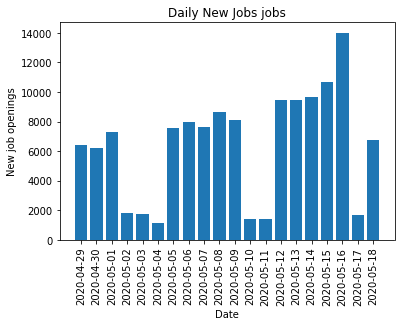

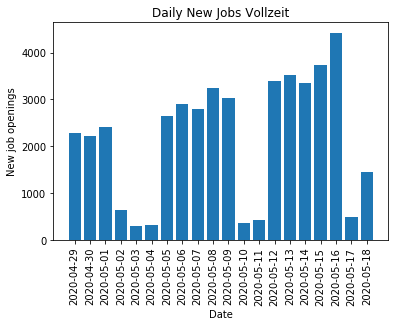

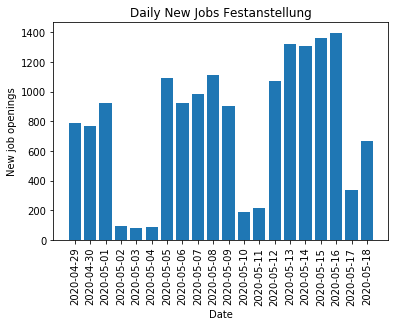

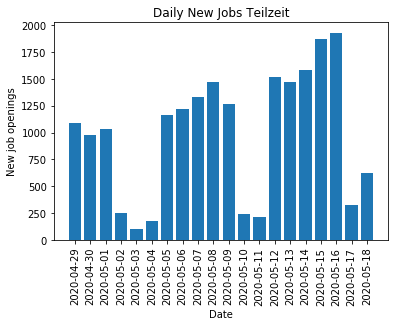

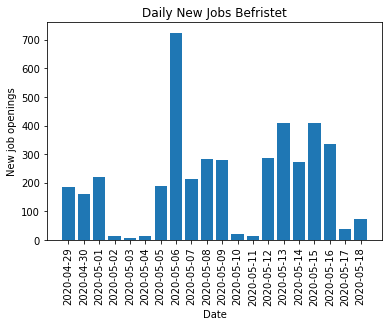

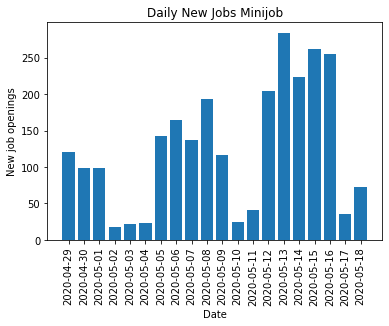

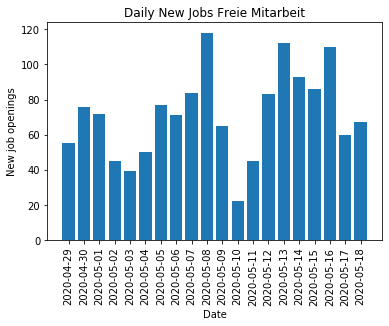

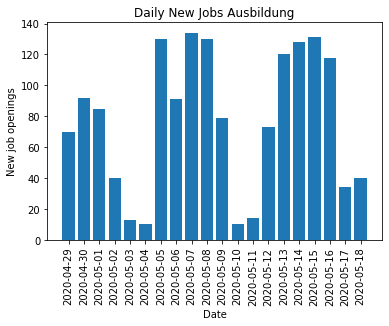

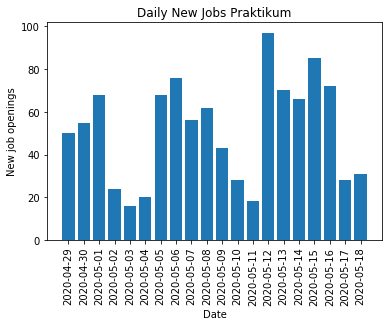

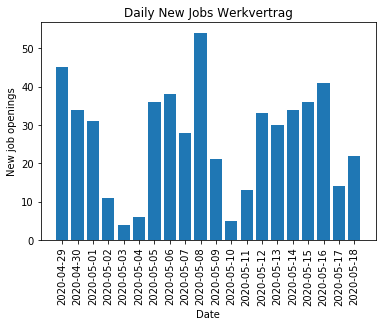

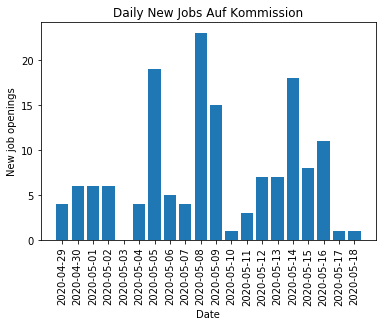

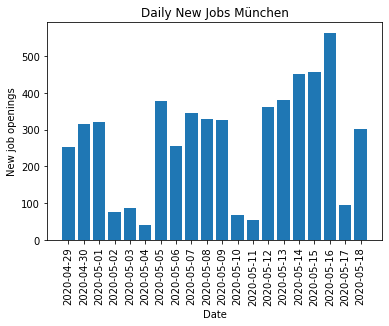

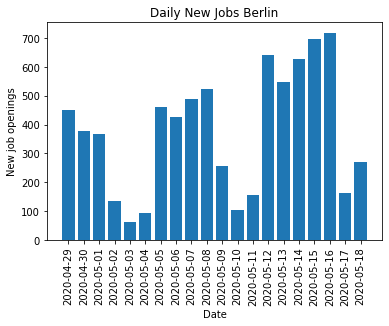

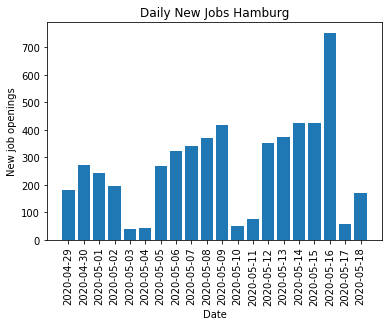

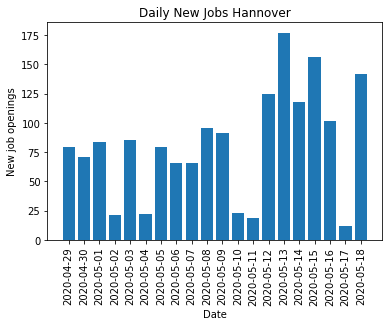

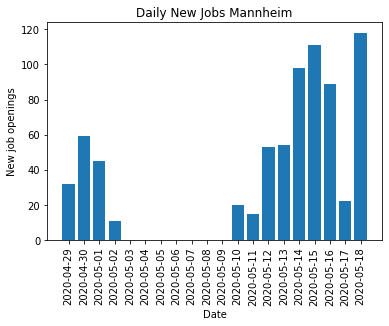

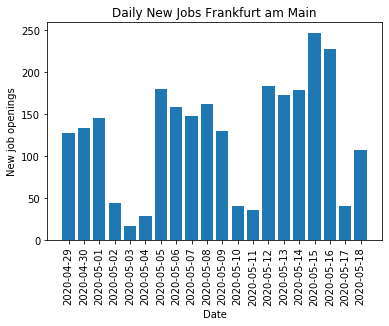

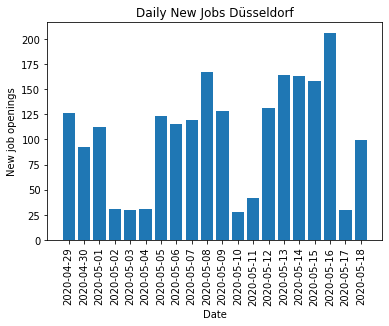

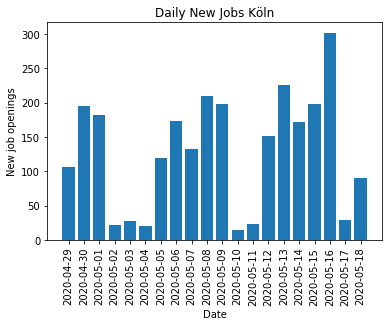

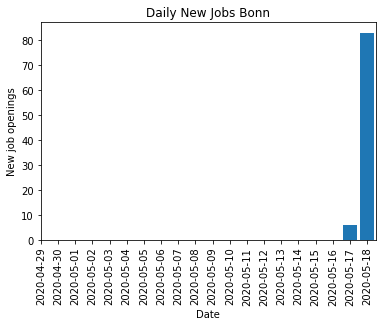

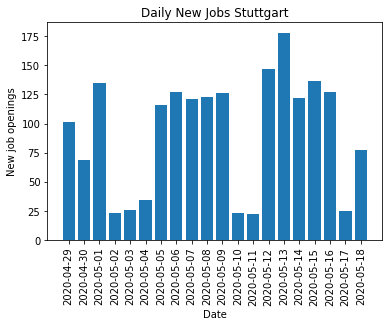

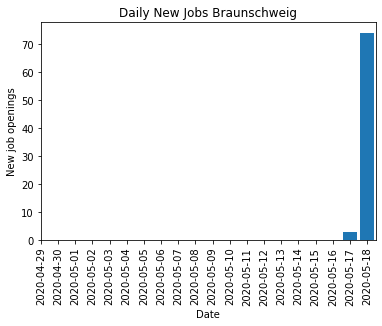

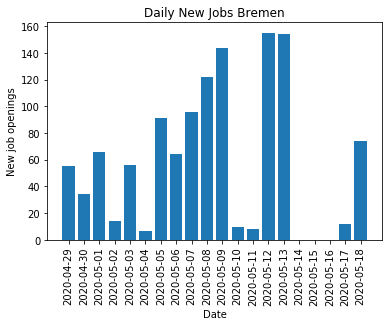

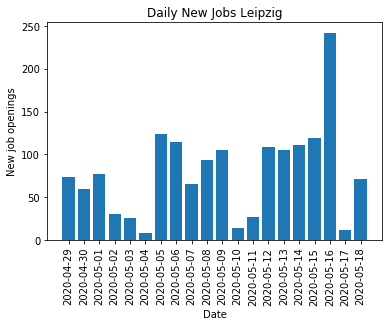

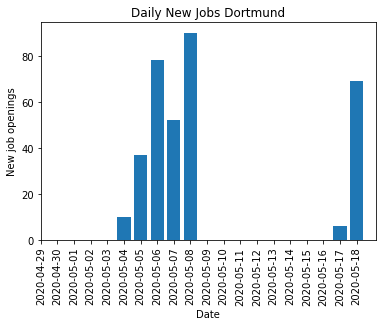

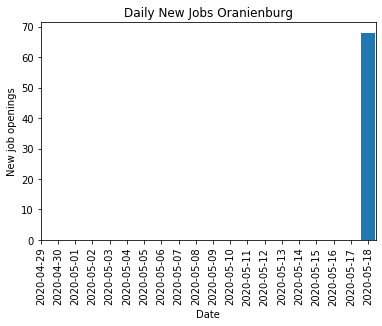

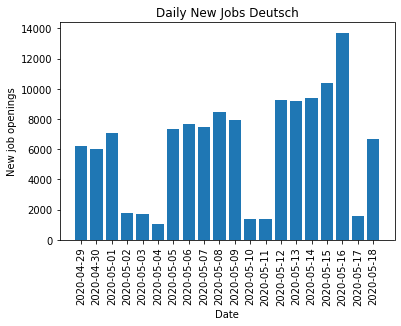

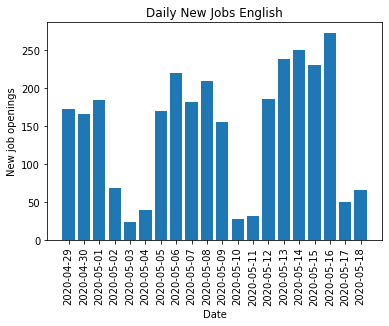

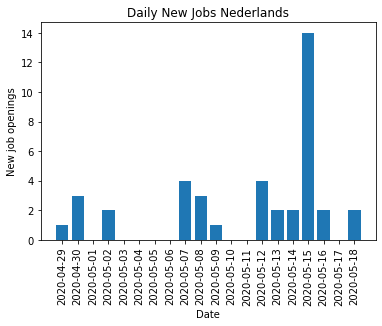

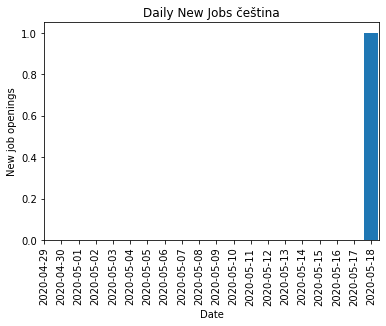

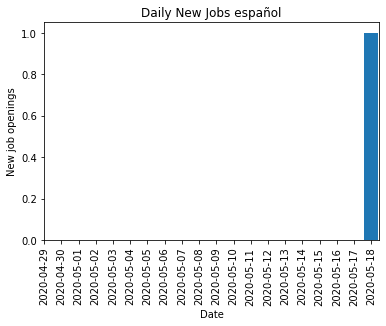

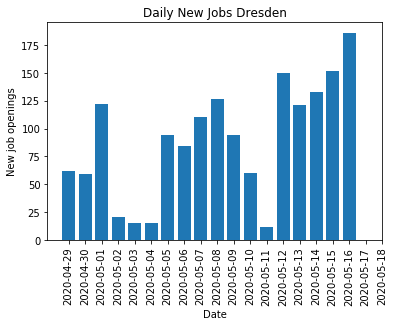

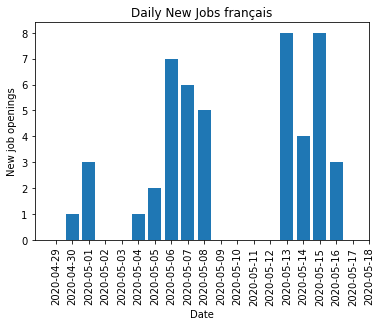

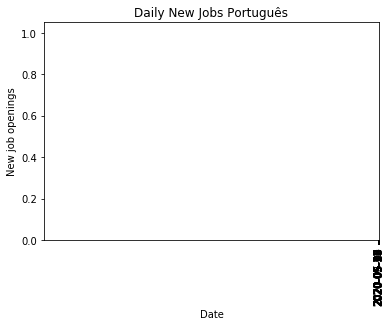

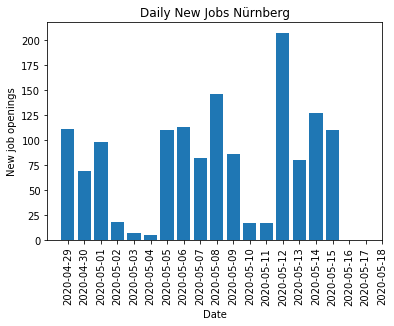

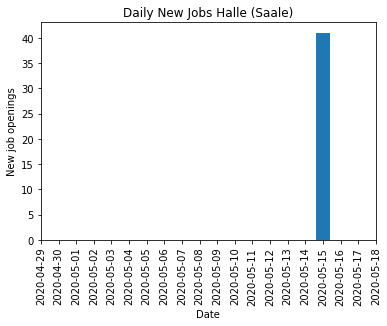

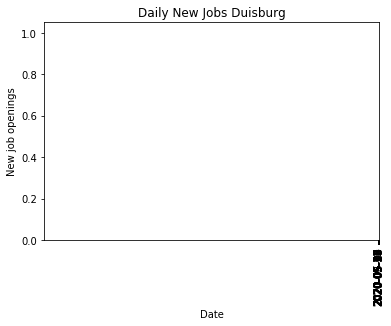

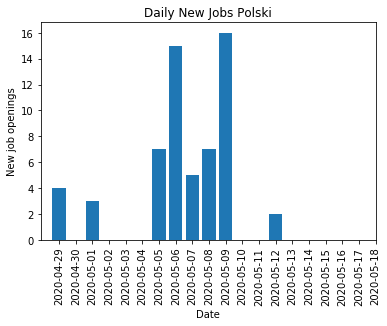

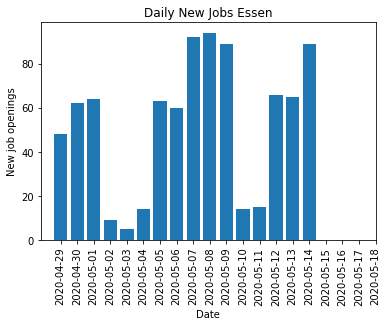

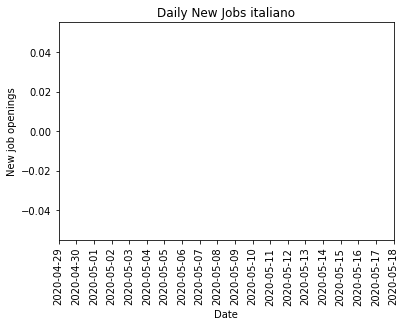

In [35]:
for column in df:
    if 'dtd' in column:
        x = df.index
        y = df[column]
        col_name = column.replace('dtd_','')
        plt.bar(x,y)
        #plt.plot(x,y, color ='red')
        plt.title('Daily New Jobs '+ col_name)
        plt.xlabel('Date')
        plt.ylabel('New job openings')
        plt.xticks(df.index, rotation=90)
        plt.show()

In [15]:
jobtypes=['Vollzeit','Festanstellung', 'Teilzeit', 'Befristet', 'Minijob', 'Freie Mitarbeit','Ausbildung', 'Praktikum', 'Werkvertrag', 'Auf Kommission']

# Top 15 companies

1. In the last 2 weeks

In [52]:
labels = [col for col in df if 'company' in col if 'Ads' not in col]
lval = df[labels].values[-14]

In [45]:
data = [col for col in df if 'company' in col if 'Ads' in col]
values = df[data].values[-14]
total = sum(values)

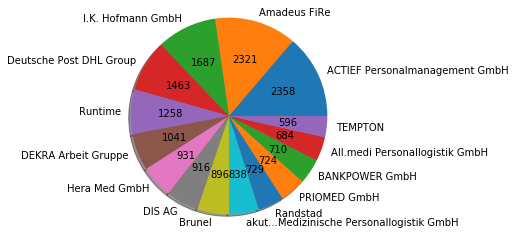

In [58]:
plt.pie(values, labels=lval, shadow=True, autopct=lambda p: '{:.0f}'.format(p * total / 100))
plt.axis('equal')
#plt.legend(title='Company', loc='right')
plt.show()